**<font color = black size=6>实验九：神经网络中的前向传播与后向传播</font>**

本次实验的主要内容是了解和熟悉PyTorch框架以及神经网络中的前向传播和后向传播在PyTorch框架下的操作，分两周完成。

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**<font color = blue size=4>第一部分:PyTorch介绍</font>**

PyTorch是最受机器学习从业者欢迎的深度学习框架之一。PyTorch 受欢迎的一些原因是它易于使用、有动态计算图，以及它比其他框架(如Tensorflow)更“Pythonic”。

这里介绍一小部分PyTorch常用的库和函数，更多需求可参阅[PyTorch官方教程](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)以及[PyTorch官方文档](https://pytorch.org/docs/stable/index.html)。

In [109]:
import torch # 导入的是 torch 而不是 pytorch
print(torch.__version__) # 输出当前pytorch的版本

1.8.1+cpu


1.Tensor

Tensor与NumPy中的ndarray很相似，但Tensor可以利用GPU来加速计算，并且Tensor可以进行自动求导(意味着很多时候不需要再手撕梯度了)。

1) Tensor的创建

In [110]:
# 创建一个未初始化的Tensor
x = torch.empty(2, 3)
print(x)

# 从一个列表创建Tensor
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)

# 创建一个随机Tensor
x = torch.rand([3, 4])
print(x)

# 创建一个全零Tensor
x = torch.zeros([2, 3])
print(x)

# 创建一个全一Tensor
x = torch.ones([2, 3])
print(x)

tensor([[7.0065e-44, 8.1275e-44, 7.2868e-44],
        [7.9874e-44, 8.1275e-44, 7.2868e-44]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[0.3024, 0.5774, 0.1551, 0.9481],
        [0.4857, 0.2014, 0.3203, 0.6147],
        [0.3807, 0.3568, 0.0197, 0.2718]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


2) Tensor的运算

In [111]:
# 加减法
x = torch.tensor([[1,2,3],[4,5,6]])
y = torch.tensor([[6,5,4],[3,2,1]])
print(x + y)
print(x - y)

# 对应位置相乘
print(x * y)
print(x.mul(y))

# 矩阵乘法
print(x.matmul(y.T))
print(x @ y.T)

# reshape
print(x.reshape(3, 2))

# 拼接
print(torch.cat([x,y], dim=0)) # 纵向拼接
print(torch.cat([x,y], dim=1)) # 横向拼接

tensor([[7, 7, 7],
        [7, 7, 7]])
tensor([[-5, -3, -1],
        [ 1,  3,  5]])
tensor([[ 6, 10, 12],
        [12, 10,  6]])
tensor([[ 6, 10, 12],
        [12, 10,  6]])
tensor([[28, 10],
        [73, 28]])
tensor([[28, 10],
        [73, 28]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [6, 5, 4],
        [3, 2, 1]])
tensor([[1, 2, 3, 6, 5, 4],
        [4, 5, 6, 3, 2, 1]])


3) Tensor与ndarray的相互转换

In [112]:
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)

# 从Tensor转换到ndarray
y = x.numpy()
print(y)

# Tensor与ndarray是共享空间的
x[:]=0
print(y)

# 从ndarray到Tensor
z = torch.from_numpy(y)
print(z)

tensor([[1, 2, 3],
        [4, 5, 6]])
[[1 2 3]
 [4 5 6]]
[[0 0 0]
 [0 0 0]]
tensor([[0, 0, 0],
        [0, 0, 0]])


2.自动求梯度

torch中的autograd包会为Tensor上的所有运算提供自动微分。它是一个define-by-run的框架，意味着后向传播取决于你的代码是如何运行的。

torch.Tensor是这个包的中心类。如果把它的属性.requires_grad置为True，那么他就会开始跟踪基于它的所有运算。当你的计算结束后，可以调用.backward()来自动计算所有的梯度。该tensor的梯度会累加到.grad属性。

In [113]:
a = torch.tensor([[1.,2.]], requires_grad=True) # 把requires_grad设为True, 开始跟踪基于它的所有运算
b = torch.tensor([[3.],[4.]])
c = torch.tensor(5., requires_grad=True)
y = a @ b + c
y.backward() #自动计算梯度
print(a.grad, c.grad) #输出叶子节点a和c的梯度

# 可支持多种运算求梯度，如torch.mean(),torch.sum()等
a = torch.ones(20, requires_grad=True)
z = torch.sum(torch.sigmoid(a))
z.backward()
print(a.grad)

# 多次求梯度时梯度会累加，可使用tensor.grad.zero_()进行手动清零
x = torch.tensor(2., requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)
z = x + 3
z.backward()
print(x.grad)
x.grad.zero_()
print(x.grad)

tensor([[3., 4.]]) tensor(1.)
tensor([0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966,
        0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966, 0.1966,
        0.1966, 0.1966])
tensor(4.)
tensor(5.)
tensor(0.)


3. 神经网络（官方教程中的例子）

（以下内容在本周不做要求，有兴趣的同学可以提前熟悉）

一个典型的神经网络训练过程如下：
* 定义一个有一些可学习参数(或权重)的神经网络
* 遍历数据集的输入
* 用神经网络来处理输入
* 计算损失函数
* 传播梯度到网络的参数中
* 更新网络的参数

1) 定义一个有一些可学习参数(或权重)的神经网络

torch.nn.Module类是所有神经网络模块的基类，我们可以通过定义一个继承torch.nn.Module的类来自定义一个神经网络模块。

自定义自己的网络的时候，需要重写\_\_init\_\_构造函数以及forward()前向传播方法。一般把网络中具有可学习参数的层(如卷积层、全连接层等)放在\_\_init\_\_()中；而不具有可学习参数的层(如池化层、ReLU层等)可写在\_\_init\_\_()中，也可写在forward()中。

backward()后向传播方法一般不用自己定义。

以下是一个例子。

In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 继承自nn.Module
class Net(nn.Module):

    def __init__(self):
        # 调用父类的构造函数
        super(Net, self).__init__()
        # 卷积层
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        # nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
        # 其中in_features表示有多少个输入，out_features表示该层有多少个神经元
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


该神经网络中可学习的参数可以通过net.parameters()访问。

In [115]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


2) 遍历数据集的输入(本例用一个随机输入来进行说明)并用神经网络来处理输入

torch.nn只支持小批量，输入中的第0维应该是本次输入的样本个数。

In [116]:
# 随机生成一个输入送入net中，除了第0维是样本个数外，其余维度要与forward()参数中x的维度对应上
input = torch.randn(1, 1, 32, 32) # 1个样本，该样本是有1个通道的32×32的图像
out = net(input) # 进行一次forward()前向传播
print(out)

tensor([[ 0.0038,  0.0268, -0.0327,  0.0031, -0.1221, -0.0418,  0.0214, -0.0229,
         -0.0131,  0.0845]], grad_fn=<AddmmBackward>)


3) 计算损失函数

In [117]:
output = net(input)
target = torch.randn(10)  # 假装是输入input对应的标签
target = target.view(1, -1)  # make it the same shape as output
# nn模块提供了许多种类的损失函数，如nn.CrossEntropyLoss()、nn.MSELoss()等等
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.8864, grad_fn=<MseLossBackward>)


计算图如下：
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> flatten -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss

In [118]:
# 查看计算图中的函数
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

4) 传播梯度到网络的参数中

In [119]:
net.zero_grad()     # 由于网络中的参数默认会累积梯度，在重新计算梯度前需要清零

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

# 进行一次后向传播
loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0184, -0.0076, -0.0011, -0.0118,  0.0048,  0.0126])


5) 更新网络的参数

可选择手动更新参数或者用PyTorch提供的优化器来更新参数。

In [120]:
# 用梯度下降法(手动)更新net中的参数
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [121]:
# 用PyTorch的优化器来更新net中的参数
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在每次循环中应该做的事:
optimizer.zero_grad()   # 把梯度清零
output = net(input) # 进行一次前向传播
loss = criterion(output, target) # 计算误差
loss.backward() # 后向传播
optimizer.step()    # 进行一次参数更新

**<font color = blue size=4>第二部分:实验内容</font>**

[Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)是一个关于红酒品质的数据集，总共有1599个样本，每个样本包含11个(都是连续的)特征以及1个标签，每个标签的取值是连续的。本次实验已经按照8：2的比例划分成了训练数据集'wine_train.csv'以及测试数据集'wine_test.csv'，且每个数据集都已经做了归一化处理。

<span style="color:purple">1) 读入训练数据集'wine_train.csv'与测试数据集'wine_test.csv'。</span>

In [1]:
# -- Your code here --
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
train_frame = pd.read_csv('wine_train.csv')
test_frame = pd.read_csv('wine_test.csv')

train = np.array(train_frame)
test = np.array(test_frame)
train_input = torch.from_numpy(train[:,0:11])
train_label = torch.from_numpy(train[:,11:12])
test_input = torch.from_numpy(test[:,0:11])
test_label = torch.from_numpy(test[:,11:12])
print(train_input.shape)
print(train_label.shape)
print(test_input.shape)
print(test_label.shape)

torch.Size([1279, 11])
torch.Size([1279, 1])
torch.Size([320, 11])
torch.Size([320, 1])


<span style="color:purple">2) 利用线性层和激活函数搭建一个神经网络，要求输入和输出维度与数据集维度一致，而神经网络深度、隐藏层大小、激活函数种类等超参数自行调整。</span>

In [2]:
# -- Your code here --


# 继承自nn.Module
class MyNet(nn.Module):

    def __init__(self):
        
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(11, 7)  
        self.fc2 = nn.Linear(7, 3)
        self.fc3 = nn.Linear(3, 1)

    def forward(self, x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


mynet = MyNet()



<span style="color:purple">3) 用梯度下降法进行模型参数更新，记下每轮迭代中的训练损失和测试损失。</span>

In [3]:
# -- Your code here --
mynet = mynet.double()
print(mynet)
ite=20
train_loss = []
test_loss = []
criterion = nn.MSELoss()
optimizer = optim.SGD(mynet.parameters(), lr=0.1)

for i in range(ite):
#     net.zero_grad()
    optimizer.zero_grad()   
    train_output = mynet(train_input)
    test_output = mynet(test_input)
    loss = criterion(train_output, train_label)
    train_loss.append(loss)
    test_loss.append(criterion(test_output, test_label))
    loss.backward()
    optimizer.step()
    


MyNet(
  (fc1): Linear(in_features=11, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)


<span style="color:purple">4) 画出训练损失和测试损失关于迭代轮数的折线图。</span>

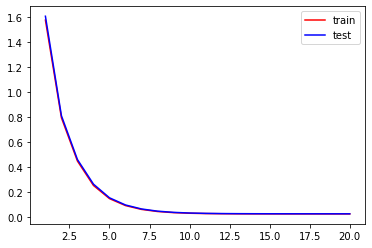

In [4]:
# -- Your code here --
y = np.arange(1,ite+1)

plt.plot(y,train_loss,color='red',label='train')
plt.plot(y,test_loss,color='blue',label='test')
plt.legend()
plt.show()


<span style="color:red"> 补充说明：学院购买了几台带有GPU的服务器，可高效进行深度学习，比个人电脑训练速度更快，有算力需求的同学可联系助教申请使用账号。</span>

**<font color = blue size=4>第三部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、实验报告下下周五实验课(5月27号前)上课前提交报告  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验九(神经网络)的实验报告上交地址:https://workspace.jianguoyun.com/inbox/collect/82f1e06ef43f4c1faf33a0ad2f44786e/submit

三、课堂课件获取地址:https://www.jianguoyun.com/p/DQlpUFYQp5WhChiS_q0E  
实验内容获取地址:https://www.jianguoyun.com/p/DbKbP-AQp5WhChi1sa0E